## Task 4.9 Part 2

## 01.

In [1]:
#import libraries
import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt
import seaborn as sns
import scipy


In [2]:
# importing data frame
path = r'C:\Users\Ali\OneDrive\Desktop\careerfoundry\Data Immersion\Achievement 4\15-08-2025 Instacart Basket Analysis'
final_dataframe = pd.read_pickle(os.path.join(path, '02 Data', 'prepared Data', 'final_dataframe.pkl'))

## 02.

### Bar Chart

<Axes: xlabel='orders_day_of_week'>

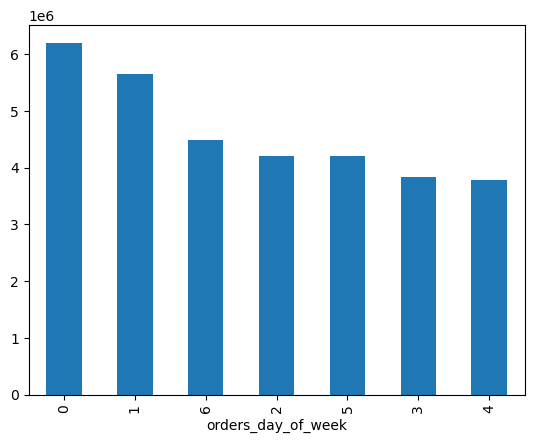

In [3]:
# creating bar chart
final_dataframe['orders_day_of_week'].value_counts().plot.bar()

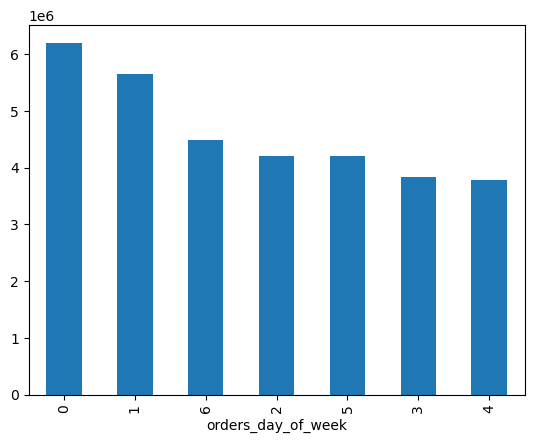

In [4]:
# saving bar chart
bar_orders_day_of_week = final_dataframe['orders_day_of_week'].value_counts().plot.bar()

In [5]:
# exporting bar chart as image file
bar_orders_day_of_week.figure.savefig(os.path.join(path, '04 Analysis','Visualizations', 'bar_orders_day_of_week_new.png'))

### Data Quality check

In [6]:
pd.set_option('display.max_columns', None)

In [7]:
final_dataframe.loc[final_dataframe['prices'] > 100]

,order_id,user_id,order_number,orders_day_of_week,order_hour_of_day,days_since_prior_order,is_first_order,product_id,add_to_cart_order,reordered,product_name,aisle_id,department_id,prices,price_range_loc,busiest_days,busiest_period_of_day,max_order,loyalty_flag,Average_price,median_days_between_orders,spending_flag,order_frequency_flag,first_name,last_name,gender,state,age,date_joined,n_dependants,family_status,income,_merge


In [44]:
# replacing odd values with NaN for now
final_dataframe.loc[final_dataframe['prices'] >100, 'prices'] = np.nan

In [45]:
final_dataframe['prices'].max()

25.0

### Histogram

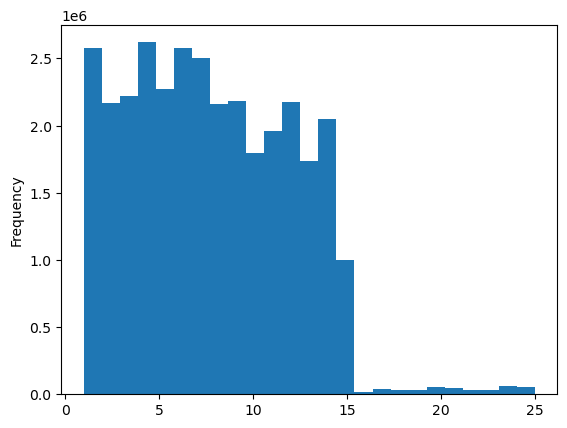

In [46]:
# creating a histogram
hist_prices_new = final_dataframe['prices'].plot.hist(bins = 25)

In [47]:
# Exporting histogram
hist_prices_new.figure.savefig(os.path.join(path, '04 Analysis','Visualizations', 'histogram_prices_new.png'))

### Scatterplot

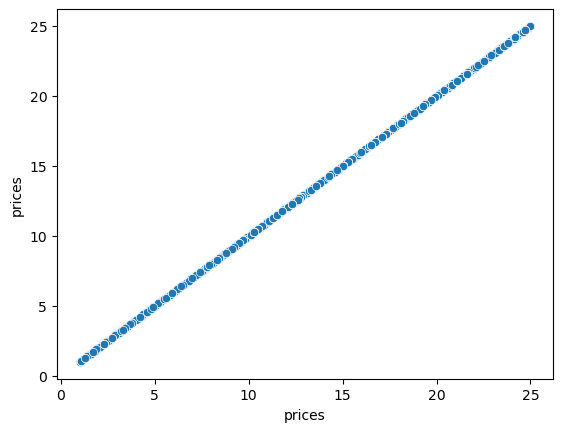

In [48]:
scatter_prices_new = sns.scatterplot(x = 'prices', y = 'prices',data = final_dataframe)

In [49]:
# Exporting scatterplot
scatter_prices_new.figure.savefig(os.path.join(path, '04 Analysis','Visualizations', 'scatterplot_prices_new.png'))

### Line Chart

In [8]:
# creating a 70/30 sample
np.random.seed(4)
#creating a list dev holding true/false values to the test np.random.rand() <=0.7
dev = np.random.rand(len(final_dataframe)) <= 0.7

In [9]:
# store 70% of the sample in the dataframe big
big = final_dataframe[dev]

In [10]:
# store 30% of the sample in the dataframe small
small = final_dataframe[~dev]

In [11]:
len(final_dataframe)

32404289

In [12]:
len(big) + len(small)

32404289

In [13]:
# creating a dataframe that only includes required columns for the line chart
df_small = small[['orders_day_of_week','prices']]

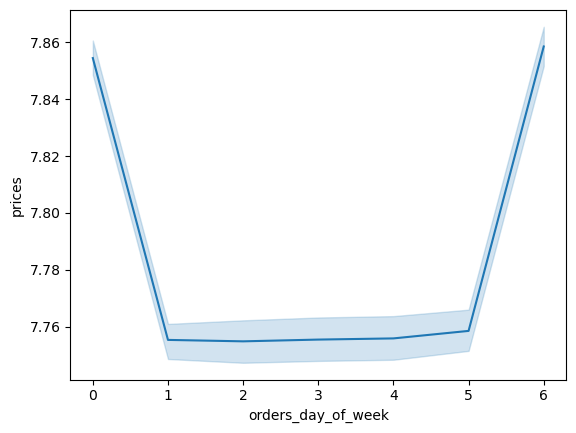

In [56]:
# creating line chart
line = sns.lineplot(data = df_small, x = 'orders_day_of_week',y = 'prices')

In [57]:
# saving line chart
line.figure.savefig(os.path.join(path, '04 Analysis','Visualizations', 'line_prices_dow_new.png'))

## 03.

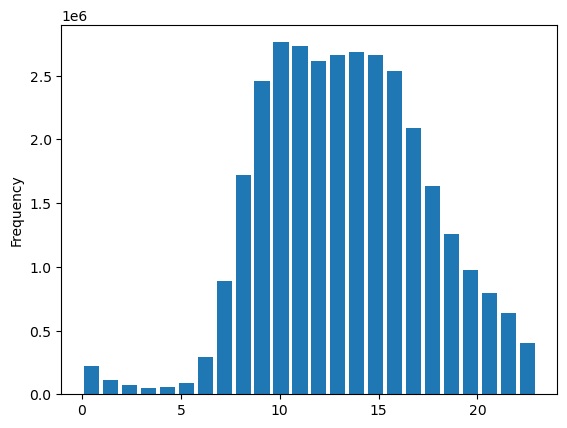

In [58]:
# creating a histogram
hist_order_hour = final_dataframe['order_hour_of_day'].plot.hist(bins = 24, rwidth=0.8)

##### This histogram tells us that very few orders are placed late at night between 0 to 5 am. The orders starts increasing around 6 to 8 am, most orders are placed between 10 am to 3 pm, after 4 pm orders starts decreasing gradually. Most orders happen during the late morning and afternoon, while very few happen at night.

In [59]:
# exporting histogram
hist_order_hour.figure.savefig(os.path.join(path, '04 Analysis','Visualizations', 'histogram_hour_of_day_new.png'))

## 04.

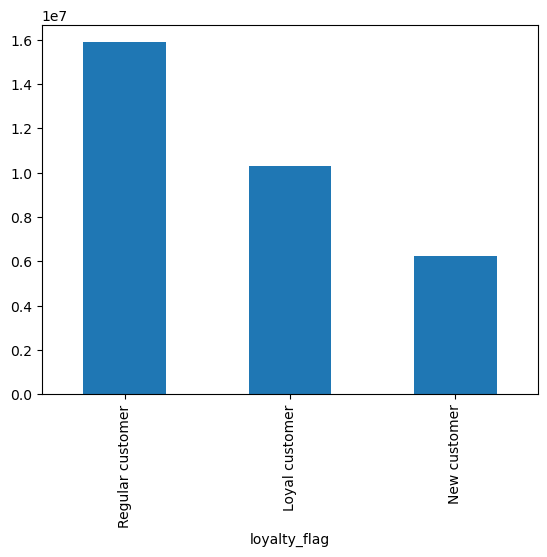

In [60]:
# creating bar chart of loyalty flag column.
bar_loyalty = final_dataframe['loyalty_flag'].value_counts().plot.bar()

##### Biggest part of Instacart's customer base belong to the regular customer category.

In [61]:
# exporting bar chart
bar_loyalty.figure.savefig(os.path.join(path, '04 Analysis','Visualizations', 'bar_loyalty_flag.png'))

### 05.

In [62]:
# creating a dataframe that only includes required columns for the line chart
df_small_new = small[['order_hour_of_day','prices']]

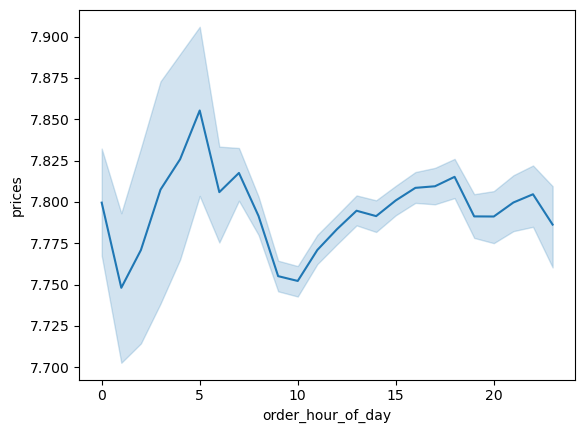

In [63]:
# creating line chart
line_2 = sns.lineplot(data = df_small_new, x = 'order_hour_of_day',y = 'prices')

In [64]:
line_2.figure.savefig(os.path.join(path, '04 Analysis','Visualizations', 'line_prices_hod.png'))

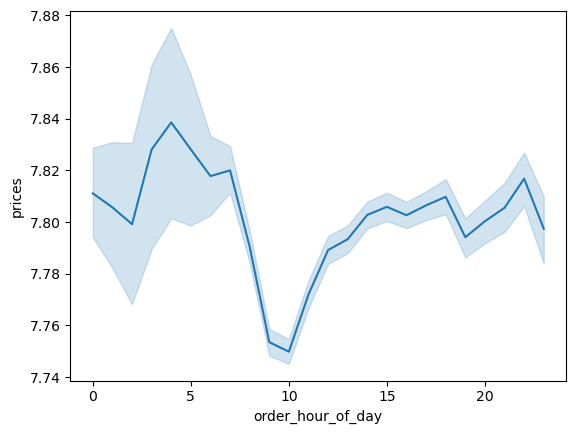

In [65]:
# creating line chart on whole data set
line_2_whole_dataset = sns.lineplot(data = final_dataframe, x = 'order_hour_of_day',y = 'prices')

In [66]:
# saving line chart created on whole data frame
line_2_whole_dataset.figure.savefig(os.path.join(path, '04 Analysis','Visualizations', 'line_prices_hod_wholedata.png'))

### 06.

In [14]:
# creating a dataframe that only includes required columns for the line chart
df_small_new2 = small[['age','n_dependants']]

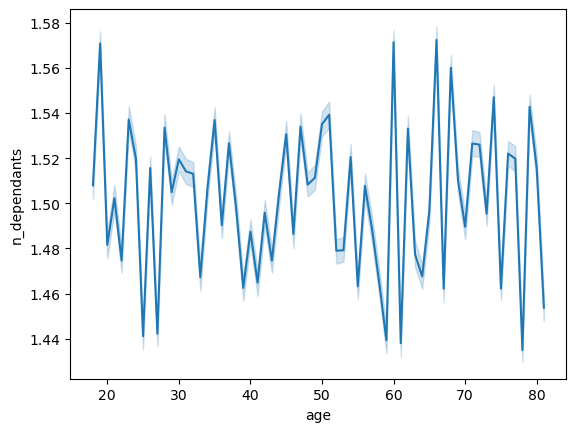

In [15]:
# creating line chart
line_3 = sns.lineplot(data = df_small_new2, x = 'age',y = 'n_dependants')

#### There is no clear correlation among age and number of dependants.

In [69]:
# saving line chart
line_3.figure.savefig(os.path.join(path, '04 Analysis','Visualizations', 'line_age_dependants.png'))

### 07.

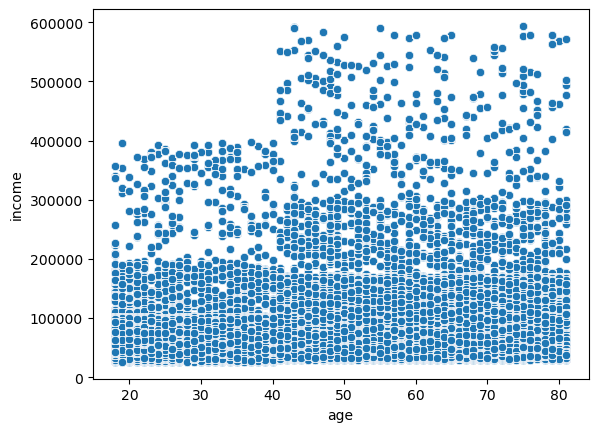

In [4]:
# creating scatterplot
scatter_age_income = sns.scatterplot(x = 'age', y = 'income',data = final_dataframe)

#### Looking at the scatter plot we can see that most data points are packed below 200,000, indicating many individuals fall in the lower-income range. There is no clear correlation among Age and income, however we can see that people between the ages of 40 and 80 show greater variance in income, some earning much more than others, while younger group between the ages 18 and 30 fall mostly under lower income brackets.

In [5]:
scatter_age_income.figure.savefig(os.path.join(path, '04 Analysis','Visualizations', 'scatter_age_income.png'))